### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [69]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt


### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
print("")
# import ratings data
ratings_ds = pd.read_csv("data.csv")
# read top 5 rows
print(ratings_ds.head())
print("Rating rows count:" ,ratings_ds.get("rating").count())
print("")
# import movie data
movies_ds = pd.read_csv("item.csv")
# read bottom 5 rows
print(movies_ds.tail())
print("Movies rows count:" ,ratings_ds.get("movie id").count())
print("")
# import user data
user_ds = pd.read_csv("user.csv")
# read top 10 rows
print(user_ds.head(10))
print("User rows count:" ,ratings_ds.get("user id").count())



   user id  movie id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
Rating rows count: 100000

      movie id                          movie title release date  unknown  \
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childrens  Comedy  Crime  ...  Fantasy  \
1676       0          0          0          0       0      0  ...        0   
1677       0          0          0          0       0      0  ...        0   
1678       0          0          0 

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [70]:
ratings_df = pd.DataFrame(ratings_ds)
ratings_df.info()
print("Ratings Shape", ratings_df.shape)
print("Ratings Describe", ratings_df.describe())
print("Number of Ratings Missing Data:\n", ratings_df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
Ratings Shape (100000, 4)
Ratings Describe             user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08


In [5]:
movies_df = pd.DataFrame(movies_ds)
movies_df.info()
print("Movies Shape", movies_df.shape)
print("Movies Describe", movies_df.describe())
print("Number of Movies Missing Data:\n", movies_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [71]:
user_df = pd.DataFrame(user_ds)
user_df.info()
print("User Shape", user_df.shape)
print("User Describe", user_df.describe())
print("Number of User Missing Data:\n", user_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
User Shape (943, 5)
User Describe           user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
Number of User Missing Data:
 user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [72]:
# function to sum genre equals 1
def fx(x):
    return np.sum(x==1)

# Load data frame
df = pd.DataFrame(movies_df)

# Drop other columns except genre
df = df.drop(["movie id", "movie title", "release date"], axis=1)

# Apply function
df = df.apply(fx)
df


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
year             0
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [73]:
# Load data frame
df = pd.DataFrame(movies_df)

# Drop movie where genre is unknown by index
df.drop(df[df['unknown'] > 0].index, inplace = True) 
df

# Assert unknown genre movie exist
df = df[df['unknown'] > 0] 
df


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [74]:
# Load data frame
movie_genre_df = pd.read_csv("item.csv", index_col=(0,1))
movie_genre_df['number of genres'] = movie_genre_df.sum(axis=1)
new_movie_genre_df=movie_genre_df.filter(['movie id','movie title','number of genres'], axis=1)
#Display movie name, number of genres for the movie in dataframe
new_movie_genre_df



,,number of genres
movie id,movie title,
1,Toy Story,3
2,GoldenEye,3
3,Four Rooms,1
4,Get Shorty,3
5,Copycat,3
...,...,...
1678,Mat' i syn,1
1679,B. Monkey,2
1680,Sliding Doors,2


In [75]:
#print(total number of movies which have more than one genres)
total_movies = new_movie_genre_df['number of genres'] > 1
print("Total number of movies which have more than one genres : ", len(new_movie_genre_df[total_movies]))



Total number of movies which have more than one genres :  849


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [76]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


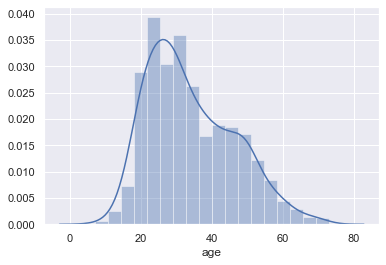

In [77]:
#*HINT: Use distplot for age. Use lineplot or countplot for release year.*
sbn.distplot(user_ds['age']);




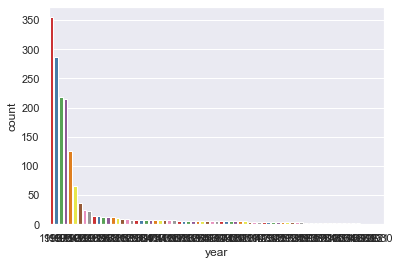

In [78]:
#*HINT: Use distplot for age. Use lineplot or countplot for release year.*


# Function to get the year 
def get_year(date): 
    return date.split('-')[2] 
          
movies_ds['year'] = movies_ds['release date'].apply(get_year) 
movies_ds
sbn.set(style='darkgrid')
release_count_plot = sbn.countplot(x = 'year',
              data = movies_ds,
              palette='Set1',
              order = movies_ds['year'].value_counts().index)
plt.show()


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [79]:

movie_ratings_ds = pd.merge(movies_ds, ratings_ds)
movie_lens_ds = pd.merge(movie_ratings_ds, user_ds)
new_movie_genre_df
ratings_ds
temp_vizualize_genre_ds = pd.merge(new_movie_genre_df, movie_lens_ds, on="movie id")
temp_vizualize_genre_ds
vizualize_genre_ds = temp_vizualize_genre_ds.copy().drop(['movie id','movie title','number of genres', 'release date','user id','rating', 'timestamp', 'age', 'gender', 'occupation', 'zip code'], axis=1)
vizualize_genre_ds = vizualize_genre_ds.set_index('year')
vizualize_genre_ds['total'] = vizualize_genre_ds.sum(axis=1)
total_ds = vizualize_genre_ds['total'].groupby(['year']).sum()
vizualize_genre_ds = vizualize_genre_ds.groupby(['year']).sum()
vizualize_genre_ds = vizualize_genre_ds.loc[:, vizualize_genre_ds.columns != 'total'].div(vizualize_genre_ds['total'], axis= 0) * 100
vizualize_genre_ds['total release'] = total_ds
vizualize_genre_ds




,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total release
year,,,,,,,,,,,,,,,,,,,,
1922,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54
1926,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1930,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18
1931,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,132
1932,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,9.791350,4.937855,1.372251,3.402508,19.818908,4.409201,1.248524,21.298015,1.186660,0.000000,2.108993,1.332883,0.613014,13.311962,2.013385,8.554075,2.806366,1.794050,17781
1995,0.0,10.767808,4.708603,2.543941,5.171138,16.840888,5.286772,0.106383,21.632747,0.726179,0.263645,1.359852,0.522664,0.647549,11.355227,5.124884,11.359852,1.304348,0.277521,21620
1996,0.0,11.645911,7.112843,1.904907,2.643441,14.765579,2.635801,0.590827,21.679782,1.166374,0.208827,2.449894,2.169761,1.561107,8.854764,4.273308,11.449818,4.665495,0.221560,39267


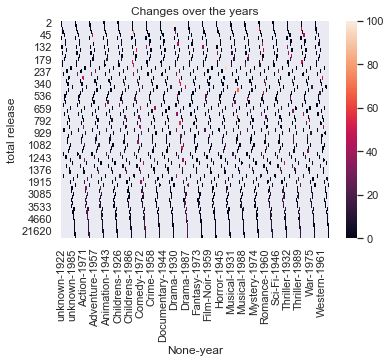

In [80]:
vizualize_genre_ds = vizualize_genre_ds.reset_index()
vizualize_genre_ds = vizualize_genre_ds.pivot("total release", "year")
ax = sbn.heatmap(vizualize_genre_ds)
plt.title("Changes over the years")
plt.show()



### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [81]:
# Find the count of ratings and average ratings for every movie.


most_rated_ds = movie_lens_ds.groupby('movie title').size().sort_values(ascending=False)[:25].to_frame('size')
most_rated_ds
movie_stats_ds = movie_lens_ds.groupby('movie title').agg({'rating': [np.size, np.mean]})
movie_stats_ds.head()
movie_stats_ds.sort_values([('rating', 'mean')], ascending=False).head()



rating     
                                              size mean
movie title                                            
Great Day in Harlem, A                           1  5.0
Prefontaine                                      3  5.0
Someone Else's America                           1  5.0
Marlene Dietrich: Shadow and Light (             1  5.0
Entertaining Angels: The Dorothy Day Story       1  5.0

In [82]:
#2. Slice the movies which have ratings more than 100.
atleast_100_ds = movie_stats_ds['rating']['size'] >= 100
atleast_100_ds


movie title
'Til There Was You                 False
1-900                              False
101 Dalmatians                      True
12 Angry Men                        True
187                                False
                                   ...  
Young Guns                          True
Young Guns II                      False
Young Poisoner's Handbook, The     False
Zeus and Roxanne                   False
Á köldum klaka (Cold Fever)        False
Name: size, Length: 1658, dtype: bool

In [83]:
#3. Sort values according to average rating such that movie which highest rating is on top.
movie_stats_ds[atleast_100_ds].sort_values([('rating', 'mean')], ascending=False)[:100]
movie_stats_ds



rating          
                                  size      mean
movie title                                     
'Til There Was You                   9  2.333333
1-900                                5  2.600000
101 Dalmatians                     109  2.908257
12 Angry Men                       125  4.344000
187                                 41  3.024390
...                                ...       ...
Young Guns                         101  3.207921
Young Guns II                       44  2.772727
Young Poisoner's Handbook, The      41  3.341463
Zeus and Roxanne                     6  2.166667
Á köldum klaka (Cold Fever)          1  3.000000

[1658 rows x 2 columns]

In [84]:
#4. Select top 25 movies.
top_25_ds = movie_lens_ds.groupby('movie id').size().sort_values(ascending=False)[:25].to_frame('size')
top_25_ds


,size
movie id,
50,583
258,509
100,508
181,507
294,485
286,481
288,478
1,452
300,431


In [85]:
#5. You will have to use the .merge() function to get the movie titles.
top_25_df = pd.DataFrame(top_25_ds)
top_25_df=top_25_df.reset_index()
most_rated_df = pd.DataFrame(most_rated_ds)
most_rated_df=most_rated_df.reset_index()
result = pd.merge(top_25_df,
                 most_rated_df[[ 'movie title', 'size']],
                 on='size')
result = result[['movie id','movie title', 'size']]
result

,movie id,movie title,size
0,50,Star Wars,583
1,258,Contact,509
2,100,Fargo,508
3,181,Return of the Jedi,507
4,294,Liar Liar,485
5,286,"English Patient, The",481
6,288,Scream,478
7,1,Toy Story,452
8,300,Air Force One,431
9,121,Independence Day (ID4),429


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [86]:
#1. Merge all the datasets
movie_lens_ds

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,War,Western,year,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,308,4,887736532,60,M,retired,95076
1,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,1995,308,5,887737890,60,M,retired,95076
2,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,1995,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,1995,308,4,887738847,60,M,retired,95076
4,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,1995,308,5,887736696,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,748,"Saint, The",14-Mar-1997,0,1,0,0,0,0,0,...,0,0,1997,729,4,893286638,19,M,student,56567
99987,751,Tomorrow Never Dies,01-Jan-1997,0,1,0,0,0,0,0,...,0,0,1997,729,3,893286338,19,M,student,56567
99988,879,"Peacemaker, The",01-Jan-1997,0,1,0,0,0,0,0,...,1,0,1997,729,3,893286299,19,M,student,56567
99989,894,Home Alone 3,01-Jan-1997,0,0,0,0,1,1,0,...,0,0,1997,729,1,893286511,19,M,student,56567


In [87]:
# * Men watch more drama than women


movie_lens_stat_ds = movie_lens_ds.copy()
movie_lens_stat_ds

women_drama_count = movie_lens_stat_ds[(movie_lens_stat_ds["gender"] == 'F') & (movie_lens_stat_ds["Drama"] == 1)]
men_drama_count = movie_lens_stat_ds[(movie_lens_stat_ds["gender"] == 'M') & (movie_lens_stat_ds["Drama"] == 1)]

print('Men Drama Count :', len(men_drama_count))
print('Women Drama Count :', len(women_drama_count))
print('Men watch more drama than women : ', len(men_drama_count)>len(women_drama_count))



Men Drama Count : 28887
Women Drama Count : 11008
Men watch more drama than women :  True


In [88]:
#* Women watch more Sci-Fi than men

women_scifi_count = movie_lens_stat_ds[(movie_lens_stat_ds["gender"] == 'F') & (movie_lens_stat_ds["Sci-Fi"] == 1)]
men_scifi_count = movie_lens_stat_ds[(movie_lens_stat_ds["gender"] == 'M') & (movie_lens_stat_ds["Sci-Fi"] == 1)]

print('Men Sci-Fi Count :', len(men_scifi_count))
print('Women Sci-Fi Count :', len(women_scifi_count))
print('Women watch more Sci-Fi than men : ', len(women_scifi_count)>len(men_scifi_count))

Men Sci-Fi Count : 10101
Women Sci-Fi Count : 2629
Women watch more Sci-Fi than men :  False


In [89]:
#* Men watch more Romance than women

women_romance_count = movie_lens_stat_ds[(movie_lens_stat_ds["gender"] == 'F') & (movie_lens_stat_ds["Romance"] == 1)]
men_romance_count = movie_lens_stat_ds[(movie_lens_stat_ds["gender"] == 'M') & (movie_lens_stat_ds["Romance"] == 1)]

print('Men Romance Count :', len(men_romance_count))
print('Women Romance Count :', len(women_romance_count))
print('Men watch more Romance than women : ', len(men_romance_count)>len(women_romance_count))


Men Romance Count : 13603
Women Romance Count : 5858
Men watch more Romance than women :  True
